# Agregacija združevanje in tranformacija podatkov

## Data Aggregation

### Introduction to the Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


### Aggregate Data with Loops

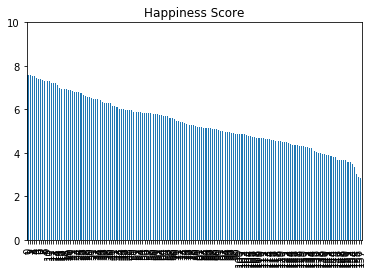

In [5]:
happiness2015['Happiness Score'].plot(kind='bar',
                                     title='Happiness Score',
                                     ylim=(0,10))

plt.show()

In [6]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [7]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']

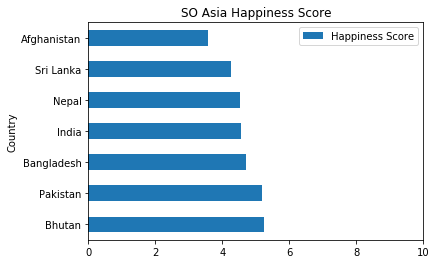

In [8]:
so_asia.plot(x='Country',
            y='Happiness Score',
            kind='barh',
            title='SO Asia Happiness Score',
            xlim=(0,10))

plt.show()

In [9]:
mean_happiness = {}

for region in happiness2015['Region'].unique():
    region_group = happiness2015[happiness2015['Region'] == region]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[region] = region_mean

In [10]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

### GroupBy Operation

In [11]:
for region in happiness2015['Region'].unique():
    #1. Razdelili dataset na grupe
    region_group = happiness2015[happiness2015['Region'] == region]
    #2. Nad vsaku grupo pokličemo funkcijo
    region_mean = region_group['Happiness Score'].mean()
    #3. združli rezultate
    mean_happiness[region] = region_mean

<img src="./images/split_apply_combine.svg">

#### Creating GroupBy Objects

    df.groupby('col')

<img src="./images/Groups.svg">

In [12]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [13]:
happiness2015.groupby('Region')

In [14]:
gruped = happiness2015.groupby('Region')
gruped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


#### Exploring GroupBy Objects

In [15]:
gruped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [16]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


#### Common Aggregation Methods

In [17]:
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

<table class="dataframe"> <thead> <tr> <th>Methods</th> <th>Description</th> </tr> </thead> <tbody> <tr> <th>mean()</th> <td>Calculates the mean of groups.</td> </tr> <tr> <th>sum()</th> <td>Calculates the sum of group values.</td> </tr> <tr> <th>size()</th> <td>Calculates the size of the groups.</td> </tr> <tr> <th>count()</th> <td>Calculates the count of values in groups.</td> </tr> <tr> <th>min()</th> <td>Calculates the minimum of group values.</td> </tr> <tr> <th>max()</th> <td>Calculates the maximum of group values.</td> </tr> </tbody> </table>

In [18]:
means = grouped.mean()

In [19]:
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


#### Aggregating Specific Columns

In [20]:
mean_happiness = {}

for region in happiness2015['Region'].unique():
    region_group = happiness2015[happiness2015['Region'] == region]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[region] = region_mean
    
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

In [21]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [22]:
# dokončni način
happiness2015.groupby('Region')['Happiness Score'].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

#### Agg() Method

    groupby.agg(fun1, fun2,...)

In [23]:
import numpy as np

In [24]:
def dif(group):
    return (group.max() - group.min())

In [25]:
happiness2015.groupby('Region')['Happiness Score'].agg([np.mean, np.max, dif]).sort_values(by='mean', ascending=False)

,mean,amax,dif
Region,,,
Australia and New Zealand,7.285000,7.286,0.002
North America,7.273000,7.427,0.308
Western Europe,6.689619,7.587,2.730
Latin America and Caribbean,6.144682,7.226,2.708
Eastern Asia,5.626167,6.298,1.424
Middle East and Northern Africa,5.406900,7.278,4.272
Central and Eastern Europe,5.332931,6.505,2.287
Southeastern Asia,5.317444,6.798,2.979
Southern Asia,4.580857,5.253,1.678


#### Computing Multiple and Custom Aggregations

In [26]:
happiness2015.groupby('Region')['Family'].max()

Region
Australia and New Zealand          1.31967
Central and Eastern Europe         1.34043
Eastern Asia                       1.30060
Latin America and Caribbean        1.30477
Middle East and Northern Africa    1.22393
North America                      1.32261
Southeastern Asia                  1.26504
Southern Asia                      1.10395
Sub-Saharan Africa                 1.18468
Western Europe                     1.40223
Name: Family, dtype: float64

### Pivot Tables

<img src="./images/PV_Syntax.svg">

In [27]:
happiness2015.groupby('Region')['Happiness Score'].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [28]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [29]:
pv_happines = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean).sort_values(by='Region', ascending=False)

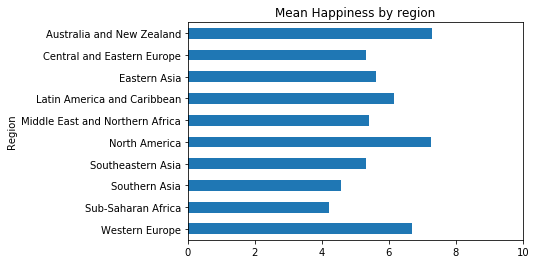

In [30]:
pv_happines.plot(kind='barh',
                title="Mean Happiness by region",
                xlim=(0,10),
                legend=False)
plt.show()

In [31]:
pv_happines = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

In [32]:
pv_happines

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [33]:
happiness2015['Happiness Score'].mean()

5.37573417721519

## Combining Data

In [34]:
import pandas as pd

happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")

In [35]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [36]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


### Combining Dataframes with the Concat Function

<img src="./images/Concat_Updated.svg">

<img src="./images/Concat_Axis1.svg">

<img src="./images/Concat_syntax.svg">

In [37]:
head_2015 = happiness2015[['Country', 'Happiness Score', 'Year']].head()

In [38]:
head_2016 = happiness2016[['Country', 'Happiness Score', 'Year']].head()

In [39]:
head_2015 = happiness2015[['Country', 'Happiness Score', 'Year']].head()

In [40]:
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016
3,Norway,7.498,2016
4,Finland,7.413,2016


In [41]:
pd.concat([head_2015, head_2016], axis=0)

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016
3,Norway,7.498,2016
4,Finland,7.413,2016


In [42]:
pd.concat([head_2015, head_2016], axis=1)

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016
3,Norway,7.522,2015,Norway,7.498,2016
4,Canada,7.427,2015,Finland,7.413,2016


In [43]:
subjects = ['Year','Country','Happiness Score', 'Standard Error']
head_2015 = happiness2015[subjects].head()
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2015,Canada,7.427,0.03553


In [44]:
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016
3,Norway,7.498,2016
4,Finland,7.413,2016


In [45]:
pd.concat([head_2015, head_2016], axis=0, sort=False)

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2015,Canada,7.427,0.03553
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN
3,2016,Norway,7.498,NaN
4,2016,Finland,7.413,NaN


<img src="./images/Concat_DifShapes.svg">

In [46]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(5)
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2015,Canada,7.427,0.03553


In [47]:
head_2016 = happiness2016[['Year','Country','Happiness Score']].head(3)
head_2016

,Year,Country,Happiness Score
0,2016,Denmark,7.526
1,2016,Switzerland,7.509
2,2016,Iceland,7.501


In [48]:
pd.concat([head_2015, head_2016], axis=1, sort=False)

,Year,Country,Happiness Score,Standard Error,Year,Country,Happiness Score
0,2015,Switzerland,7.587,0.03411,2016.0,Denmark,7.526
1,2015,Iceland,7.561,0.04884,2016.0,Switzerland,7.509
2,2015,Denmark,7.527,0.03328,2016.0,Iceland,7.501
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN
4,2015,Canada,7.427,0.03553,NaN,NaN,NaN


In [49]:
pd.concat([head_2015, head_2016], axis=0, sort=False, ignore_index=True)

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2015,Canada,7.427,0.03553
5,2016,Denmark,7.526,NaN
6,2016,Switzerland,7.509,NaN
7,2016,Iceland,7.501,NaN


### Joining Dataframes with the Merge Function

<img src="./images/Merge_link.svg">

<img src="./images/Merge.svg">

<img src="./images/Merge_syntax.svg">

In [50]:
three_2015 = happiness2015[['Year','Country','Happiness Score']].iloc[2:5]
three_2016 = happiness2016[['Year','Country','Happiness Score']].iloc[2:5]

In [51]:
three_2015

,Year,Country,Happiness Score
2,2015,Denmark,7.527
3,2015,Norway,7.522
4,2015,Canada,7.427


In [52]:
three_2016

,Year,Country,Happiness Score
2,2016,Iceland,7.501
3,2016,Norway,7.498
4,2016,Finland,7.413


In [53]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

In [54]:
merged

,Year_x,Country,Happiness Score_x,Year_y,Happiness Score_y
0,2015,Norway,7.522,2016,7.498


In [55]:
pd.merge(left=three_2016, right=three_2015, on='Country')

,Year_x,Country,Happiness Score_x,Year_y,Happiness Score_y
0,2016,Norway,7.498,2015,7.522


#### Joining on Columns

<ol>
<li><strong>Inner</strong>: only includes elements that appear in both dataframes with a common key</li>
<li><strong>Outer</strong>: includes all data from both dataframes</li>
<li><strong>Left</strong>: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes</li>
<li><strong>Right</strong>: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes</li>
</ol>

In [56]:
merged_left = pd.merge(left=three_2015,
                      right=three_2016,
                      on='Country',
                      how='left')

In [57]:
merged_left

,Year_x,Country,Happiness Score_x,Year_y,Happiness Score_y
0,2015,Denmark,7.527,NaN,NaN
1,2015,Norway,7.522,2016.0,7.498
2,2015,Canada,7.427,NaN,NaN


In [58]:
pd.merge(left=three_2016,
          right=three_2015,
          on='Country',
          how='left')

,Year_x,Country,Happiness Score_x,Year_y,Happiness Score_y
0,2016,Iceland,7.501,NaN,NaN
1,2016,Norway,7.498,2015.0,7.522
2,2016,Finland,7.413,NaN,NaN


#### Left Joins

In [59]:
pd.merge(left=three_2016,
          right=three_2015,
          on='Country',
          how='left',
        suffixes=('_2016', '_2015'))

,Year_2016,Country,Happiness Score_2016,Year_2015,Happiness Score_2015
0,2016,Iceland,7.501,NaN,NaN
1,2016,Norway,7.498,2015.0,7.522
2,2016,Finland,7.413,NaN,NaN


#### Join on Index

<img src="./images/Index.svg">

In [60]:
four_2015 = happiness2015[['Country', 'Happiness Score', 'Year']].iloc[2:6]
three_2016 = happiness2016[['Country', 'Happiness Score', 'Year']].iloc[2:5]

In [61]:
four_2015

,Country,Happiness Score,Year
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
5,Finland,7.406,2015


In [62]:
three_2016

,Country,Happiness Score,Year
2,Iceland,7.501,2016
3,Norway,7.498,2016
4,Finland,7.413,2016


In [63]:
pd.merge(left=four_2015,
          right=three_2016,
          left_index=True,
          right_index=True,
          how='inner',
          suffixes=('_2015', '_2016'))

,Country_2015,Happiness Score_2015,Year_2015,Country_2016,Happiness Score_2016,Year_2016
2,Denmark,7.527,2015,Iceland,7.501,2016
3,Norway,7.522,2015,Norway,7.498,2016
4,Canada,7.427,2015,Finland,7.413,2016


In [64]:
pd.merge(left=four_2015,
          right=three_2016,
          left_index=True,
          right_index=True,
          how='left',
          suffixes=('_2015', '_2016'))

,Country_2015,Happiness Score_2015,Year_2015,Country_2016,Happiness Score_2016,Year_2016
2,Denmark,7.527,2015,Iceland,7.501,2016.0
3,Norway,7.522,2015,Norway,7.498,2016.0
4,Canada,7.427,2015,Finland,7.413,2016.0
5,Finland,7.406,2015,NaN,NaN,NaN


### Primer: Combine Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


In [65]:
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)

In [66]:
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [67]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [68]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [69]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [70]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [71]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

In [72]:
happiness = pd.concat([happiness2015, happiness2016, happiness2017], sort=True)

In [73]:
happiness.head()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,NaN,1.34951,0.66557,0.29678,1.0,7.587,...,NaN,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,NaN,1.40223,0.62877,0.43630,2.0,7.561,...,NaN,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,NaN,1.36058,0.64938,0.34139,3.0,7.527,...,NaN,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,NaN,1.33095,0.66973,0.34699,4.0,7.522,...,NaN,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,NaN,1.32261,0.63297,0.45811,5.0,7.427,...,NaN,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,NaN,2015


In [74]:
happiness.tail()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Economy..GDP.per.Capita.,Family,Freedom,Generosity,Happiness Rank,Happiness Score,...,Health..Life.Expectancy.,Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Trust..Government.Corruption.,Upper Confidence Interval,Whisker.high,Whisker.low,Year
150,Rwanda,NaN,0.540061,NaN,0.368746,0.945707,0.581844,0.252756,NaN,3.471,...,0.326425,NaN,NaN,NaN,NaN,0.455220,NaN,3.543030,3.398970,2017
151,Syria,NaN,1.061574,NaN,0.777153,0.396103,0.081539,0.493664,NaN,3.462,...,0.500533,NaN,NaN,NaN,NaN,0.151347,NaN,3.663669,3.260331,2017
152,Tanzania,NaN,0.621130,NaN,0.511136,1.041990,0.390018,0.354256,NaN,3.349,...,0.364509,NaN,NaN,NaN,NaN,0.066035,NaN,3.461430,3.236570,2017
153,Burundi,NaN,1.683024,NaN,0.091623,0.629794,0.059901,0.204435,NaN,2.905,...,0.151611,NaN,NaN,NaN,NaN,0.084148,NaN,3.074690,2.735310,2017
154,Central African Republic,NaN,2.066005,NaN,0.000000,0.000000,0.270842,0.280876,NaN,2.693,...,0.018773,NaN,NaN,NaN,NaN,0.056565,NaN,2.864884,2.521116,2017


In [75]:
happiness.shape

(470, 22)

In [76]:
pivot_happiness = happiness.pivot_table(values='Happiness Score', index='Year', aggfunc=np.mean)

In [77]:
pivot_happiness

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


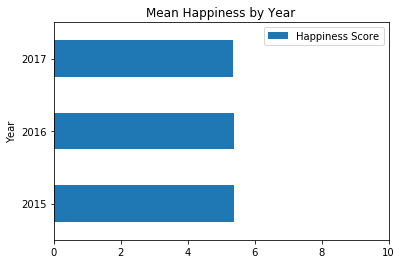

In [78]:
pivot_happiness.plot(kind='barh', title='Mean Happiness by Year', xlim=(0,10))
plt.show()

## Transforming Data

In [79]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [80]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [81]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

In [82]:
happiness2015 = happiness2015.rename(mapping, axis=1)

In [83]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


### Map and Apply Methods (Element-wise)

In [84]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

<img src="./images/Map_generic.svg">

In [85]:
economy_impact_map = happiness2015['Economy'].map(label)

In [86]:
economy_impact_map

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [87]:
economy_impact_apply = happiness2015['Economy'].apply(label)

In [88]:
economy_impact_apply

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [89]:
economy_impact_map.equals(economy_impact_apply)

True

<img src="./images/Map.svg">

In [90]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [91]:
happiness2015['Economy'].map(label, x=0.8)

TypeError: map() got an unexpected keyword argument 'x'

In [92]:
happiness2015['Economy'].apply(label, x=0.8)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [93]:
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label, x=1)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label, x=1)

In [94]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Family Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Low,Low
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Low,Low
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Low,Low
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low,Low


### Applymap Method (Element-wise to Multiple Columns)

In [101]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

    df.applymap(funkcija)

In [96]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Economy Impact', 'Family Impact'],
      dtype='object')

In [97]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'] 

In [102]:
factors_impact = happiness2015[factors].applymap(label)

In [103]:
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


### Apply Method (along an Axis)

<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

In [104]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


<img src="./images/Apply_counts.svg">

In [98]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [107]:
# tega ne moremo 
# happiness2015[factors].apply(label)

In [108]:
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


In [109]:
def v_counts(stolpec):
    num = stolpec.value_counts()
    stevilo_elementov = stolpec.size
    return num/stevilo_elementov

In [110]:
v_counts_procent = factors_impact.apply(v_counts)

In [112]:
v_counts_procent*100

,Economy,Family,Health,Freedom,Trust,Generosity
High,41.772152,56.329114,1.265823,NaN,NaN,NaN
Low,58.227848,43.670886,98.734177,100.0,100.0,100.0


In [113]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
happiness2015['Factors Sum'] = happiness2015[factors].sum(axis=1)

In [115]:
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [116]:
def procenti_po_kategorijah(stolpec):
    div = stolpec/happiness2015['Happiness Score']
    return div*100

In [117]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
factor_percentages = happiness2015[factors].apply(procenti_po_kategorijah)

In [119]:
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


### Melt Function

In [120]:
happy_two = happiness2015.head(2)

In [121]:
happy_two

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Family Impact,Factors Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,High,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,High,7.56092


In [122]:
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


<img src="./images/Melt_Syntax.svg">

In [124]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [132]:
melt_happy = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

In [133]:
melt_happy.head(15)

,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629
5,Finland,Western Europe,6,7.406,Economy,1.29025
6,Netherlands,Western Europe,7,7.378,Economy,1.32944
7,Sweden,Western Europe,8,7.364,Economy,1.33171
8,New Zealand,Australia and New Zealand,9,7.286,Economy,1.25018
9,Australia,Australia and New Zealand,10,7.284,Economy,1.33358


In [129]:
melt_happy.shape

(1106, 6)

In [130]:
melt_happy['Percentage'] = round((melt_happy['value']/melt_happy['Happiness Score'])*100, 2)

In [131]:
melt_happy.head(15)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
5,Finland,Western Europe,6,7.406,Economy,1.29025,17.42
6,Netherlands,Western Europe,7,7.378,Economy,1.32944,18.02
7,Sweden,Western Europe,8,7.364,Economy,1.33171,18.08
8,New Zealand,Australia and New Zealand,9,7.286,Economy,1.25018,17.16
9,Australia,Australia and New Zealand,10,7.284,Economy,1.33358,18.31


In [137]:
melt_happy['variable'].value_counts()

Health               158
Trust                158
Dystopia Residual    158
Generosity           158
Family               158
Freedom              158
Economy              158
Name: variable, dtype: int64

### Primer: Aggregate the Data and Create a Visualization

In [139]:
pv_melt = melt_happy.pivot_table(index='variable', values='value')

In [140]:
pv_melt

,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


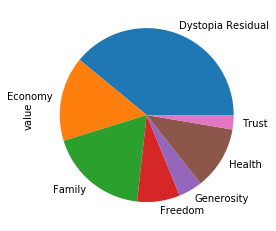

In [141]:
pv_melt.plot(kind='pie', y='value', legend=False)
plt.show()


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>